# The Sparks Foundation Data Science and Analytics Internship

## Task # 2 - To Explore Supervised Machine Learning

### Problem Statement:
In this regression task we will predict the percentage of
marks that a student is expected to score based upon the
number of hours they studied. This is a simple linear
regression task as it involves just two variables.


### Importing Libraries

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing Given Dataset

In [123]:
data = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

### Glancing at the Dataset

In [124]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Getting Information about the Dataset

In [125]:
data.info

<bound method DataFrame.info of     Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86>

### Checking for presence of NULL Values

In [126]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

No Null Values Present.

### Plotting the Dataset

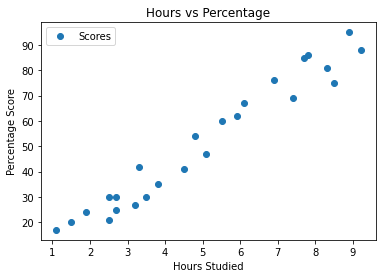

In [127]:
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

### We will create a scatter plot matrix that will allow us to visualize the pair-wise relationship between the different features.It is also quite helpful to have a quick overview on how the data is distributed and whether it contains outliers or not

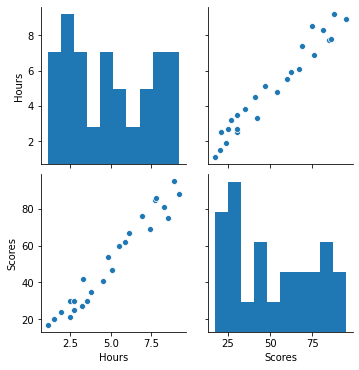

In [128]:
sns.pairplot(data)

### Visualising the Correlation Matrix

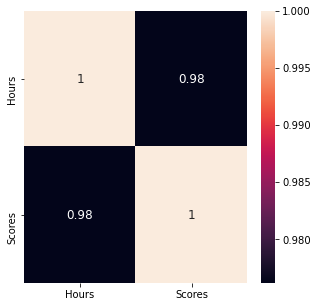

In [129]:
corrmat = data.corr()
fig,ax = plt.subplots(figsize = (5,5))
sns.heatmap(corrmat , annot = True , annot_kws ={'size':12} )

### Getting the input and ouput values from Dataset

In [130]:
X = data.iloc[:, :-1].values  
Y = data.iloc[:, 1].values  

### Splitting the Dataset

In [131]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size = 0.2 , random_state = 0)

### Creating a Linear Regression model and training it 

In [132]:
from sklearn.linear_model import LinearRegression
lnr = LinearRegression()
lnr.fit(X_train,Y_train)
lnr_pred = lnr.predict(X_test)

### Plotting the Regression Line

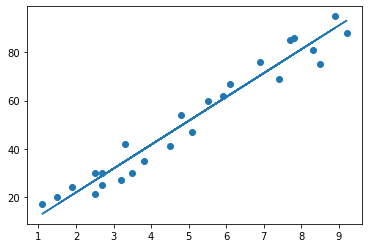

In [133]:
line = lnr.coef_*X+lnr.intercept_
plt.scatter(X, Y)
plt.plot(X, line)
plt.show()

### Comparing Actual Value VS Predicted Value

In [134]:
df = pd.DataFrame({'Actual': Y_test, 'Predicted': lnr_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### Evaluating the Model

In [135]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(Y_test, lnr_pred)) 

Mean Absolute Error: 4.183859899002975


## Question Given:
What will be predicted score if a student study for 9.25 hrs in a
day?

In [136]:
hours = [9.25]
own_pred = lnr.predict([hours])
print("No of Hours = {}".format(hours[0]))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538
